In [1]:
import pandas as pd
import numpy as np

import random
np.random.seed(42)
random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [4]:
from google.colab import files
uploaded = files.upload()

Saving asma_updated_sales.xlsx to asma_updated_sales.xlsx


In [5]:
!pip install xlrd

In [7]:
df = pd.read_excel('asma_updated_sales.xlsx')

In [8]:
df.head()

,NAME,T_MONTH,LEV1GRPNAME,LEV2GRPNAME,GRPNAME,SUM(I.QTY),SUM(I.TAXABLEAMT),CNAME3,DISCOUNT,MRP,TAX_AMT
0,Asma Jayanagar,2019-03-01,WOMENS,APPARELS,GOWN,4.0,30004.46,UNDEFINED,0.0,33605.0,3600.54
1,Asma Jayanagar,2019-03-01,WOMENS,APPARELS,ANARKALI,2.0,8910.72,2083,0.0,9980.0,1069.28
2,Asma Jayanagar,2019-03-01,WOMENS,APPARELS,STRAIGHTCUT,1.0,3995.54,3424,0.0,4475.0,479.46
3,Gtx-Jayanagar,2019-03-01,MENS,APPARELS,SHORT KURTA,15.0,13142.90,UNDEFINED,0.0,8280.0,657.10
4,Gtx-Jayanagar,2019-03-01,MENS,FABRIC,SHIRTING,8.6,8471.42,GREEN,0.0,5240.0,423.58


In [9]:
df['T_MONTH'] = pd.to_datetime(df['T_MONTH'], format= ('%d-%m-%Y'))

In [10]:
df.sort_values(by = 'T_MONTH', inplace = True)

In [11]:
df.reset_index(drop = True, inplace = True)

In [12]:
df.head()

,NAME,T_MONTH,LEV1GRPNAME,LEV2GRPNAME,GRPNAME,SUM(I.QTY),SUM(I.TAXABLEAMT),CNAME3,DISCOUNT,MRP,TAX_AMT
0,Asma-Malleswaram,2019-02-01,MENS,APPARELS,KP SET,1.0,2674.10,SILK KURTAS,0.0,2995.0,320.90
1,Asma Jayanagar,2019-03-01,WOMENS,APPARELS,GOWN,4.0,30004.46,UNDEFINED,0.0,33605.0,3600.54
2,Asma-Malleswaram,2019-03-01,MENS,FABRIC,SUITING,2.5,2371.42,276,0.0,1992.0,118.58
3,Asma Jayanagar,2019-03-01,WOMENS,APPARELS,KURTI,2.0,3391.08,PR FTUNC W AL 86,0.0,3798.0,406.92
4,Asma-Malleswaram,2019-03-01,MENS,ACCESSORIES,JUTI,1.0,1330.36,MJ-857,0.0,1490.0,159.64


In [13]:
df.set_index('T_MONTH', inplace = True)

In [14]:
df.head()

,NAME,LEV1GRPNAME,LEV2GRPNAME,GRPNAME,SUM(I.QTY),SUM(I.TAXABLEAMT),CNAME3,DISCOUNT,MRP,TAX_AMT
T_MONTH,,,,,,,,,,
2019-02-01,Asma-Malleswaram,MENS,APPARELS,KP SET,1.0,2674.10,SILK KURTAS,0.0,2995.0,320.90
2019-03-01,Asma Jayanagar,WOMENS,APPARELS,GOWN,4.0,30004.46,UNDEFINED,0.0,33605.0,3600.54
2019-03-01,Asma-Malleswaram,MENS,FABRIC,SUITING,2.5,2371.42,276,0.0,1992.0,118.58
2019-03-01,Asma Jayanagar,WOMENS,APPARELS,KURTI,2.0,3391.08,PR FTUNC W AL 86,0.0,3798.0,406.92
2019-03-01,Asma-Malleswaram,MENS,ACCESSORIES,JUTI,1.0,1330.36,MJ-857,0.0,1490.0,159.64


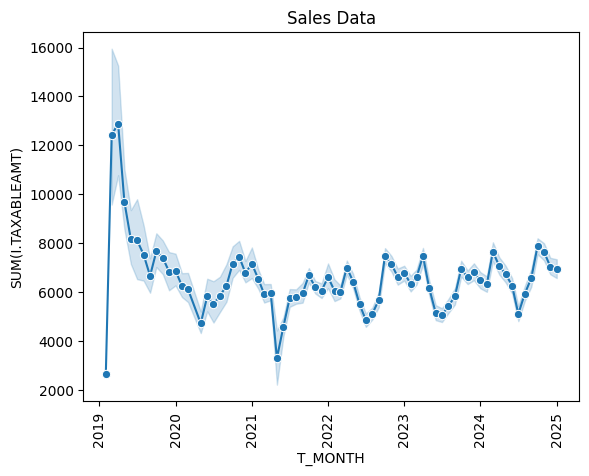

In [15]:
#plot the time series data
sns.lineplot(x = 'T_MONTH', y = 'SUM(I.TAXABLEAMT)', data = df, marker = 'o')
plt.title('Sales Data')
plt.xticks(rotation = 90)
plt.show()

Train Test split

In [18]:
# Group by T_MONTH and aggregate the sales (SUM(I.TAXABLEAMT)) per month
df_new = df.groupby(df.index).agg({'SUM(I.TAXABLEAMT)': 'sum'})

df_new.head()


,SUM(I.TAXABLEAMT)
T_MONTH,
2019-02-01,2674.10
2019-03-01,6563212.66
2019-04-01,15335678.73
2019-05-01,18012171.72
2019-06-01,12537502.99


In [19]:
df_new.shape

(71, 1)

In [22]:
#total length
n = len(df_new)
#train size
m = int(n*0.8)

df_train = df_new.iloc[0:m]
df_test = df_new.iloc[m:n]

print(f"Total df_new size {len(df_new)}")
print(f"Total train data size {len(df_train)}")
print(f"Total test data size {len(df_test)}")

Total df_new size 71
Total train data size 56
Total test data size 15


In [27]:
df_train.tail()

,SUM(I.TAXABLEAMT)
T_MONTH,
2023-06-01,10146634.59
2023-07-01,13000596.49
2023-08-01,13350154.49
2023-09-01,15118928.11
2023-10-01,22035143.82


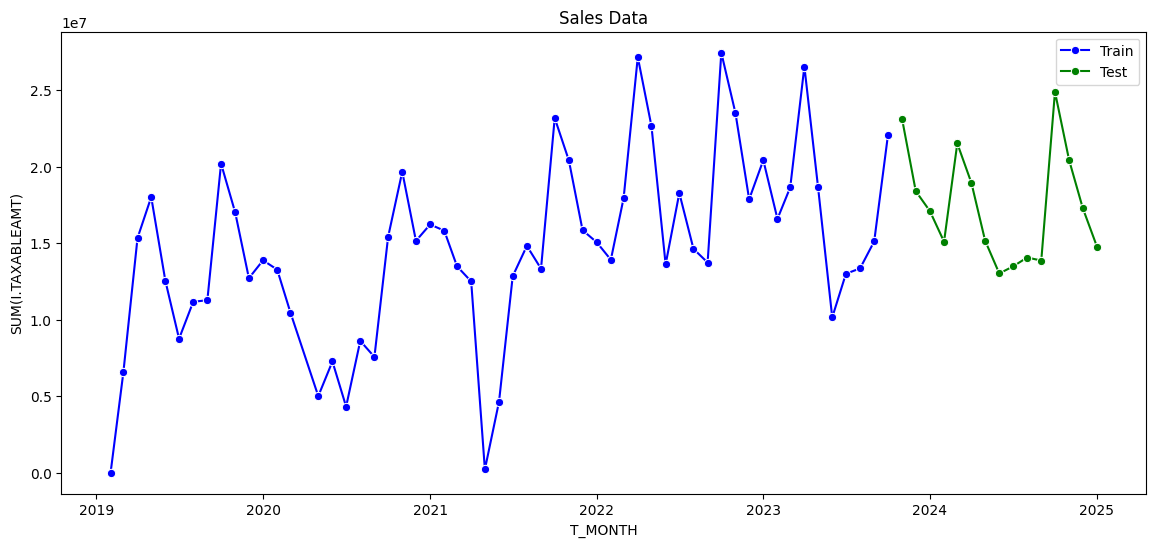

In [28]:
#Plot the time series data with the train test split
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'T_MONTH', y = 'SUM(I.TAXABLEAMT)', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'T_MONTH', y = 'SUM(I.TAXABLEAMT)', marker = 'o', color = 'green', label = 'Test')
plt.title('Sales Data');

BOX COX

In [56]:
from scipy.stats import boxcox

In [57]:
#Use the 'boxcox' method to transform the 'Sales' variable
df_boxcox = pd.Series(boxcox(df_train['SUM(I.TAXABLEAMT)'], lmbda = 0), index = df_train.index)

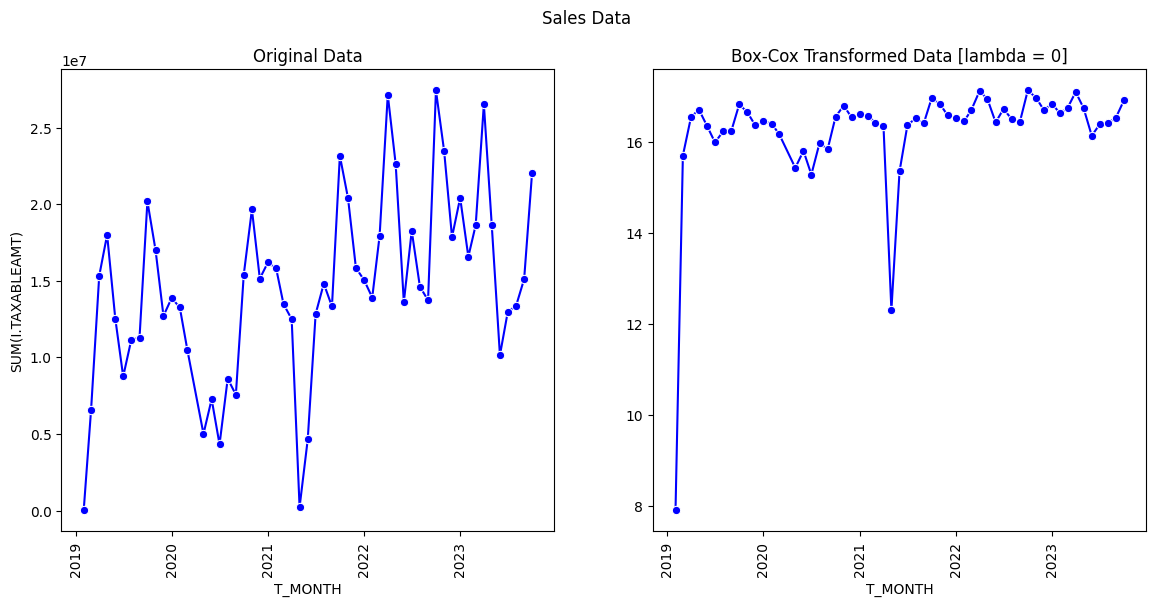

In [58]:
# Plot the original time series data and its Box-Cox transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'T_MONTH', y = 'SUM(I.TAXABLEAMT)', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox.index, y = df_boxcox.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Box-Cox Transformed Data [lambda = 0]')

plt.suptitle('Sales Data');

DIFFERENCING

In [59]:
# Obtain the first-order differenced version of the time series data
df_differenced = df['SUM(I.TAXABLEAMT)'] - df['SUM(I.TAXABLEAMT)'].shift()

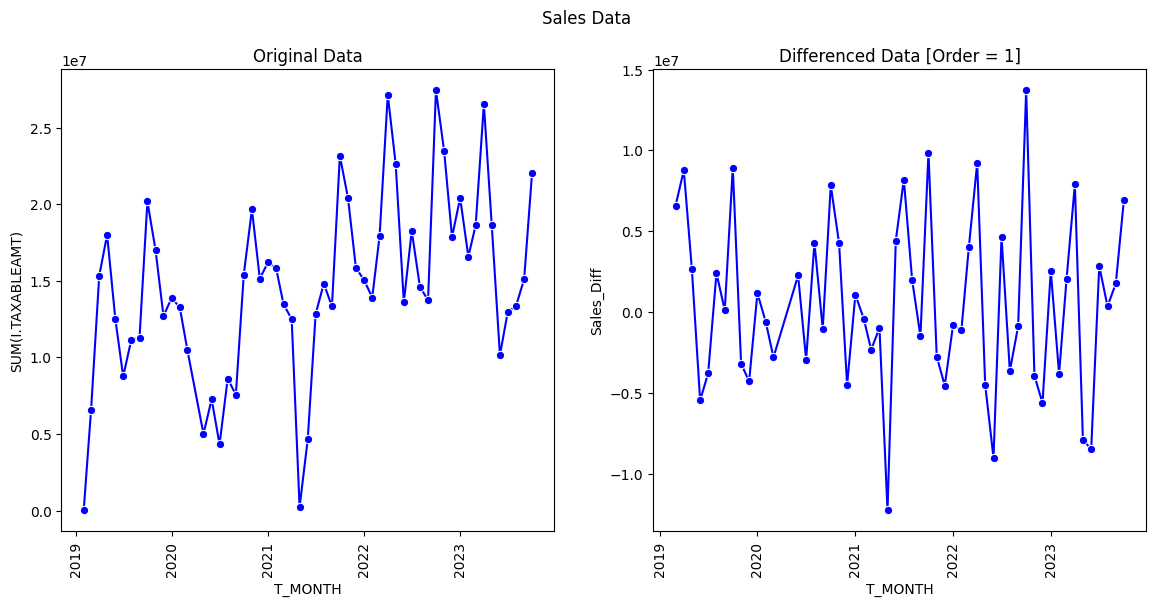

In [60]:
# Plot the original time series data and its first-order differenced version

df_train['Sales_Diff'] = df_train['SUM(I.TAXABLEAMT)'].diff()

# Plot differenced data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_train, x='T_MONTH', y='SUM(I.TAXABLEAMT)', marker='o', color='blue')
plt.xticks(rotation=90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(data=df_train.iloc[1:], x='T_MONTH', y='Sales_Diff', marker='o', color='blue')  # Skip NaN
plt.xticks(rotation=90)
plt.title('Differenced Data [Order = 1]')

plt.suptitle('Sales Data')
plt.show()


TRANSFORMED TIME SERIES DATA

In [64]:
# Apply the Box-Cox and differencing transformations on the training data
df_boxcox = pd.Series(boxcox(df_train['SUM(I.TAXABLEAMT)'], lmbda = 0), index = df_train.index)
df_boxcox_diff = df_boxcox - df_boxcox.shift()

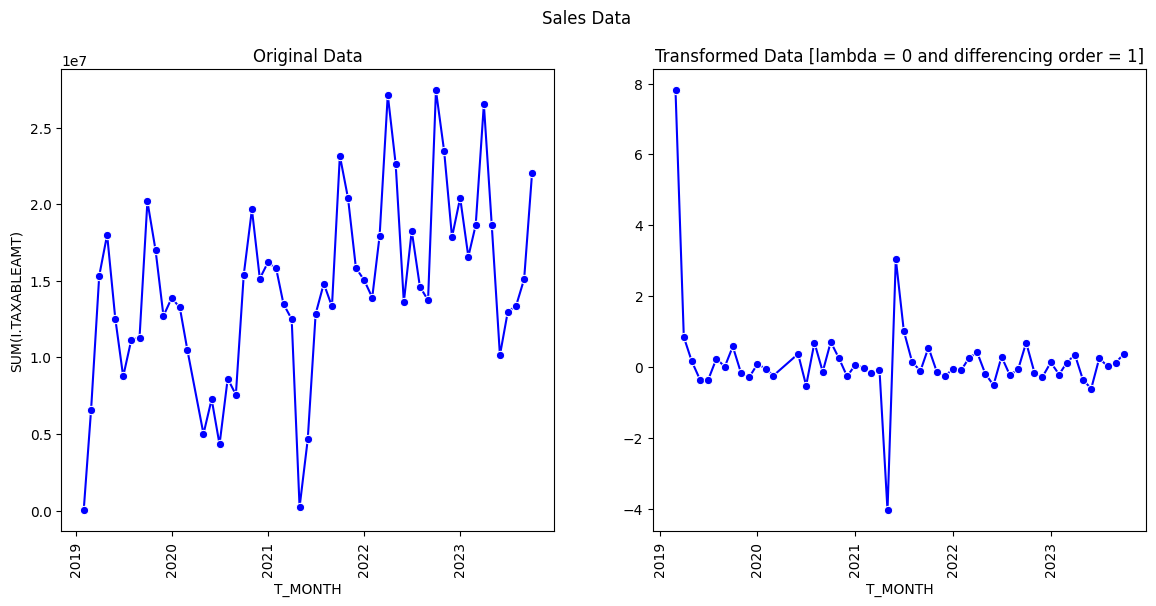

In [65]:
# Plot the original time series data and its transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'T_MONTH', y = 'SUM(I.TAXABLEAMT)', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox_diff.index, y = df_boxcox_diff.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Transformed Data [lambda = 0 and differencing order = 1]')

plt.suptitle('Sales Data');

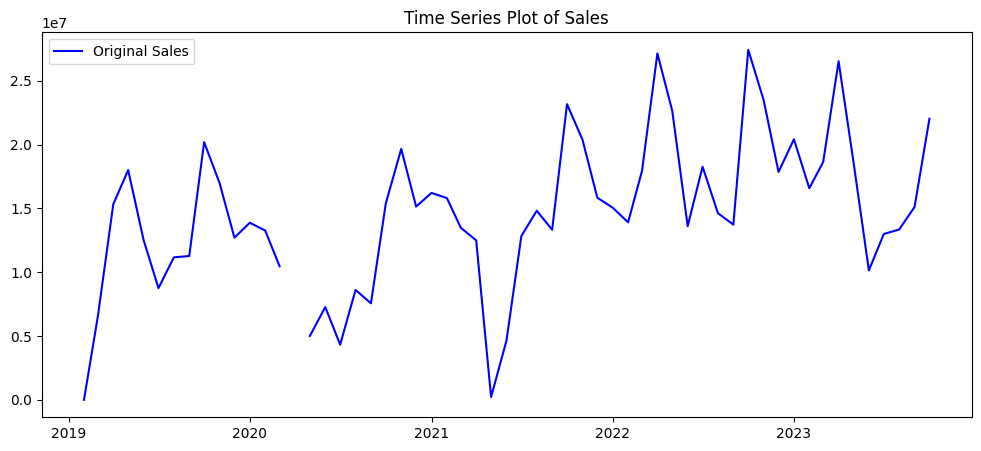

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['SUM(I.TAXABLEAMT)'], label="Original Sales", color="blue")
plt.title("Time Series Plot of Sales")
plt.legend()
plt.show()


In [75]:
df_train['BoxCox'] = np.log(df_train['SUM(I.TAXABLEAMT)'])  # If Box-Cox fails

In [77]:
df_train['BoxCox_Diff'] = df_train['BoxCox'].diff()
df_train.dropna(inplace=True)

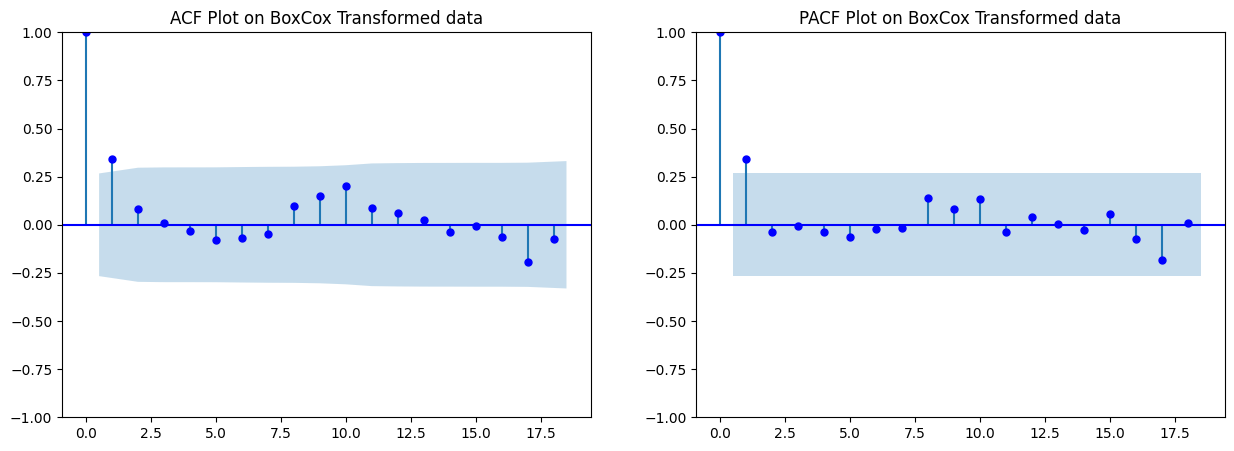

In [83]:
#Plotting acf and pacf side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df_train['BoxCox'], ax=axes[0], color='blue')  # Autocorrelation
axes[0].set_title('ACF Plot on BoxCox Transformed data')

plot_pacf(df_train['BoxCox'], ax=axes[1], color='blue')  # Partial Autocorrelation
axes[1].set_title('PACF Plot on BoxCox Transformed data')

plt.show()

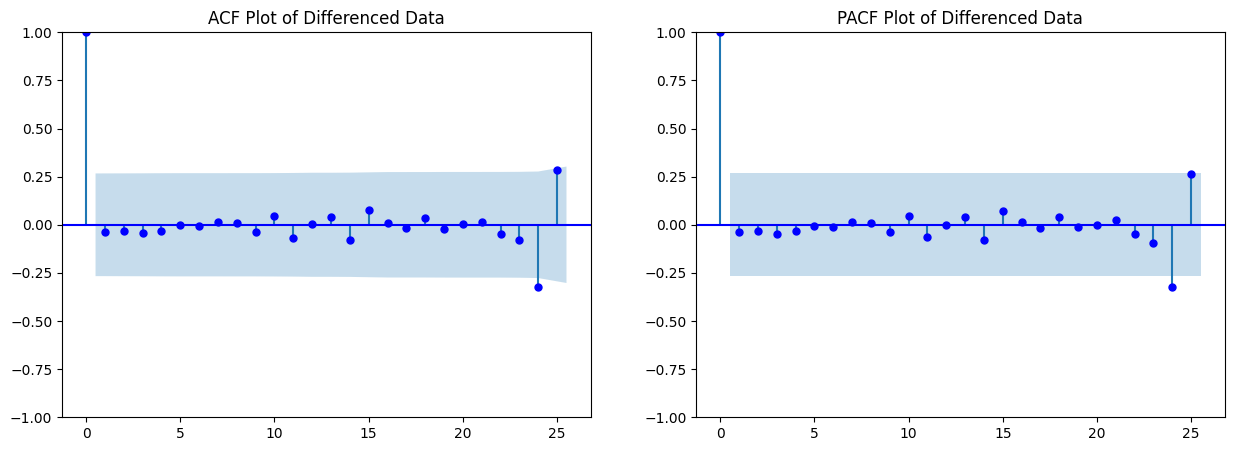

In [82]:
# ACF and PACF on differenced data (Box-Cox differenced)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df_train['BoxCox_Diff'], lags=25, ax=axes[0], color='blue')  # ACF on differenced data
axes[0].set_title('ACF Plot of Differenced Data')

plot_pacf(df_train['BoxCox_Diff'], lags=25, ax=axes[1], color='blue')  # PACF on differenced data
axes[1].set_title('PACF Plot of Differenced Data')

plt.show()

ACF/PACF on Box-Cox Transformed Data: This looks at how the data behaves after variance stabilization (Box-Cox transformation).


ACF/PACF on Differenced Data: This looks at the autocorrelations and partial autocorrelations after differencing, which is often used when preparing data for ARIMA.

FIT ARIMA model

In [86]:
#Importing ARIMA
from statsmodels.tsa.arima.model import ARIMA

train_ratio = 0.8  # Use 80% for training
train_len = int(train_ratio * len(df_boxcox_diff))

df_train = df_boxcox_diff[:train_len]  # First 80% as training
df_test = df_boxcox_diff[train_len:]  # Remaining 20% as testing

In [87]:
# Define and fit AR(1) model
ar_model = ARIMA(df_boxcox_diff, order=(1, 0, 0))  # AR model
ar_model_fit = ar_model.fit()

# Obtain predictions
train_len = len(df_train)
ar_model_preds = ar_model_fit.predict(start=train_len, end=len(df_boxcox_diff)-1)

In [88]:
# Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
ar_model_preds = ar_model_preds.to_frame(name="Predictions")
df_boxcox_diff_preds = pd.concat([df_boxcox_diff, ar_model_preds])

In [89]:
# Reverse the differencing transformation that was done on the data
df_boxcox_preds = df_boxcox_diff_preds.cumsum() + df_boxcox.iloc[0]

In [90]:
# Reverse the Box-Cox transformation that was done on the data
from scipy.special import inv_boxcox
lambda_value = 0.745

df_preds = inv_boxcox(df_boxcox_preds, lambda_value)
df_preds.head()

,0,Predictions
T_MONTH,,
2019-02-01,NaN,NaN
2019-03-01,30.293686,NaN
2019-04-01,32.336115,NaN
2019-05-01,32.727046,NaN
2019-06-01,31.848233,NaN


In [92]:
print(df_preds.index[train_len:].shape)
print(df_preds.values[train_len:].shape)

(24,)
(24, 2)


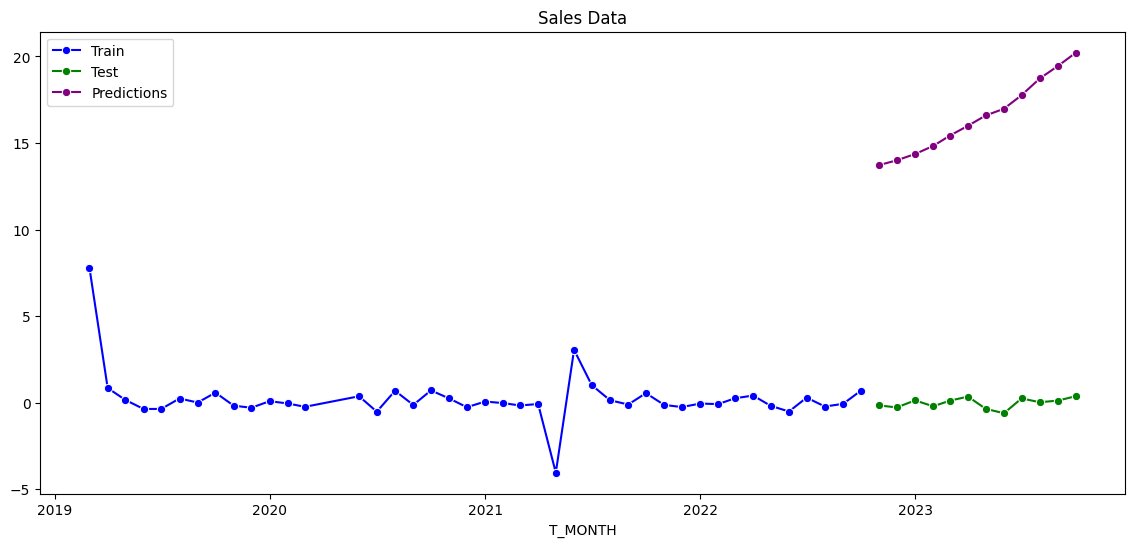

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.special import inv_boxcox
from statsmodels.tsa.arima.model import ARIMA

# Splitting into training and test data
train_ratio = 0.8  # Use 80% for training
train_len = int(train_ratio * len(df_boxcox_diff))

df_train = df_boxcox_diff[:train_len]  # First 80% as training
df_test = df_boxcox_diff[train_len:]  # Remaining 20% as testing

# Define and fit AR(1) model
ar_model = ARIMA(df_boxcox_diff, order=(11, 0, 0))  # AR model
ar_model_fit = ar_model.fit()

# Obtain predictions
ar_model_preds = ar_model_fit.predict(start=train_len, end=len(df_boxcox_diff)-1)

# Ensure the predictions align with the test data
ar_model_preds = pd.Series(ar_model_preds, index=df_test.index)

# Reverse the differencing transformation
df_boxcox_preds = ar_model_preds.cumsum() + df_boxcox.iloc[0]

# Reverse the Box-Cox transformation
lambda_value = 0.745
df_preds = inv_boxcox(df_boxcox_preds, lambda_value)

# Plot the time series
plt.figure(figsize=(14, 6))
sns.lineplot(x=df_train.index, y=df_train.values, marker='o', color='blue', label='Train')
sns.lineplot(x=df_test.index, y=df_test.values, marker='o', color='green', label='Test')
sns.lineplot(x=df_preds.index, y=df_preds.values, marker='o', color='purple', label='Predictions')

plt.title('Sales Data')
plt.legend()
plt.show()


SARIMA

1. SARIMA Model Parameters:

p: Non-seasonal autoregressive order

d: Non-seasonal differencing order

q: Non-seasonal moving average order

P: Seasonal autoregressive order

D: Seasonal differencing order

Q: Seasonal moving average order

S: The length of the seasonal cycle

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


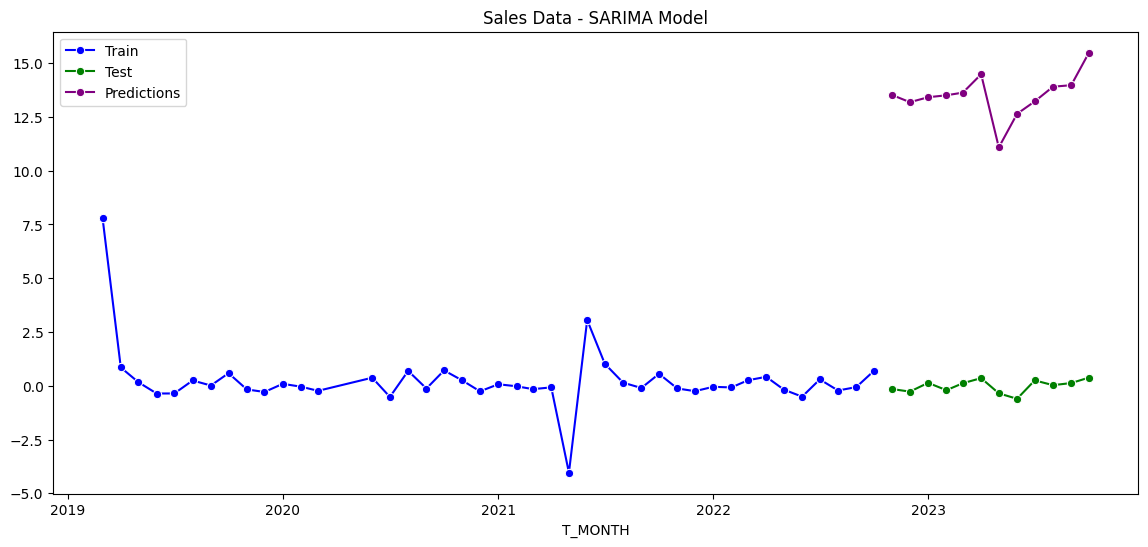

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Splitting the data into training and testing sets
train_ratio = 0.8  # Use 80% for training
train_len = int(train_ratio * len(df_boxcox_diff))

df_train = df_boxcox_diff[:train_len]  # First 80% as training
df_test = df_boxcox_diff[train_len:]  # Remaining 20% as testing

# Fit the SARIMA model
# (p, d, q) = (1, 1, 1) is a placeholder, change as per your ACF and PACF analysis
# (P, D, Q, S) = (1, 1, 1, 12) is used for monthly data with annual seasonality (12 periods per year)
sarima_model = SARIMAX(df_train,
                       order=(1, 1, 1),  # Non-seasonal AR, differencing, and MA
                       seasonal_order=(1, 1, 1, 12),  # Seasonal AR, differencing, MA, and seasonality length (12 months)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_fit = sarima_model.fit(disp=False)

# Forecasting the future values
sarima_preds = sarima_fit.predict(start=train_len, end=len(df_boxcox_diff)-1, dynamic=False)

# Reverse the differencing transformation
sarima_preds = sarima_preds.cumsum() + df_boxcox.iloc[0]

# Reverse the Box-Cox transformation
df_sarima_preds = inv_boxcox(sarima_preds, 0.745)

# Plotting the results
plt.figure(figsize=(14, 6))
sns.lineplot(x=df_train.index, y=df_train.values, marker='o', color='blue', label='Train')
sns.lineplot(x=df_test.index, y=df_test.values, marker='o', color='green', label='Test')
sns.lineplot(x=df_sarima_preds.index, y=df_sarima_preds.values, marker='o', color='purple', label='Predictions')

plt.title('Sales Data - SARIMA Model')
plt.legend()
plt.show()



In [96]:
# Import 'ARIMA' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.arima.model import ARIMA

In [97]:
# Fit an AR model to the transformed training data with lag order 1 and view its optimal parameter values
# Note: You may try other suitable lag order values as well
ar_model = ARIMA(df_boxcox_diff, order = (11, 0, 0))
ar_model = ar_model.fit()

# Obtain predictions from the AR model for the testing data indices
train_len = 42
ar_model_preds = ar_model.predict(start = train_len, end = len(df)-1)

# Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
df_boxcox_diff_preds = pd.concat([df_boxcox_diff, ar_model_preds])

# Reverse the differencing transformation that was done on the data
df_boxcox_preds = df_boxcox_diff_preds.cumsum()
df_boxcox_preds = df_boxcox_preds.add(df_boxcox[0])

# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

OutOfBoundsDatetime: Out of bounds timestamp: 15646-11-01 00:00:00 with frequency 'ns'